In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)
import pymongo
from pymongo import MongoClient

client = pymongo.MongoClient('localhost', 27017)

db = client.jays_opener
collection = db['Tweets']
cursor = collection.find()

In [2]:
df = pd.DataFrame(list(cursor))
df[:3]

,_id,geo,location,name,screen_name,source,text,time
0,5522ab2b7e9aed108af53689,None,"Altona, Manitoba",Kelvin Heppner,RealAg_Kelvin,TweetDeck,Crop plans and projections for #BlueJays new s...,11:50
1,5522ab2c7e9aed108af5368a,None,"Burlington, Ontario, Canada",Brian Cappellaro,bcappellaro,Twitter for BlackBerry,RT @Wilnerness590: Happy Opening Day!!! #Bluej...,11:50
2,5522ab2e7e9aed108af5368b,None,,Brad Funk,FunkBrad,Twitter for iPhone,RT @SiddallJoe: Happy Opening Day from #Yankee...,11:50


In [3]:
df.set_index('time', drop=False, inplace=True)

In [4]:
total_tweets = pd.Series.count(df['time'])
total_tweets

2359

Show the heaviest tweeting times
-------------------------------------

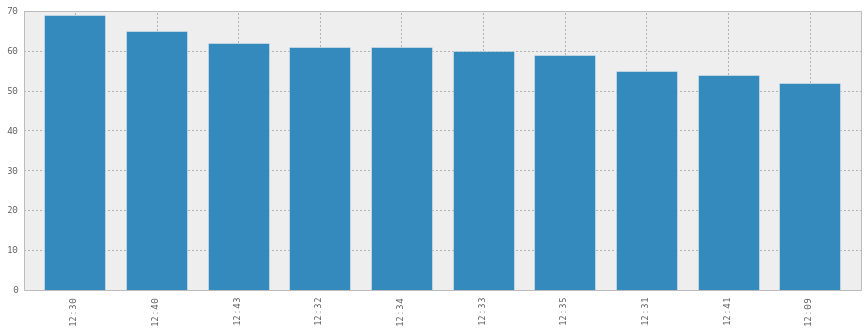

In [5]:
dbase1m = pd.Series.value_counts(df['time'], normalize=False, sort=True, ascending=False, bins=None)
dbase1m[:10].plot(kind='bar')

Plot the frequencies of tweets per minute during the past week
-----------------------------------------------------------------------

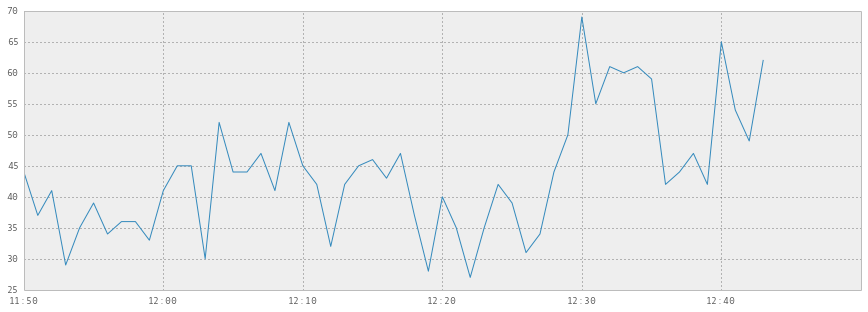

In [6]:
tweet_freq = dbase1m.sort_index()
tweet_freq.plot()

Average tweets per minute during the past week
----------------------------------------------------

In [7]:
avg = int(dbase1m.mean())
avg

43

Most frequent locations tweeted from during the past week
-----------------------------------------------------------------
This is all over the place because anyone is free to put any location they want in twitter.

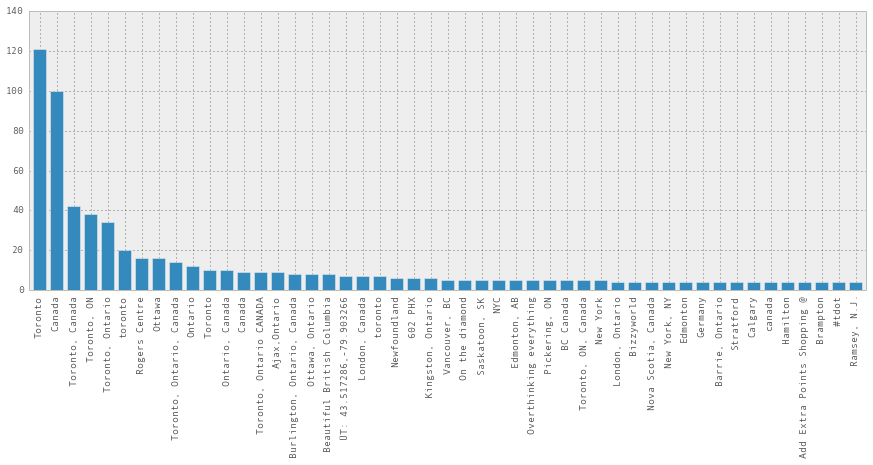

In [8]:
tweeted_from = pd.Series.value_counts(df['location'], normalize=False, sort=True, ascending=False, bins=None)
tweeted_from[1:50].plot(kind='bar')

The weeks top tweeters
-------------------------

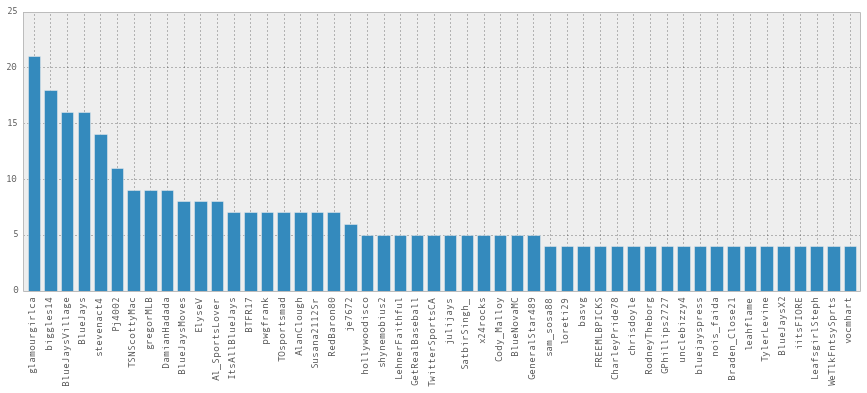

In [9]:
top_tweeter = pd.Series.value_counts(df['name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name = pd.Series.value_counts(df['screen_name'], normalize=False, sort=True, ascending=False, bins=None)
top_tweeter_screen_name[:50].plot(kind='bar')

In [10]:
top_tweeter_screen_name[:10]

glamourgirlca      21
biggles14          18
BlueJaysVillage    16
BlueJays           16
stevenact4         14
Pj4002             11
TSNScottyMac        9
gregorMLB           9
DamianHadada        9
BlueJaysMoves       8
dtype: int64

...and these are their twitter names
--------------------------------------

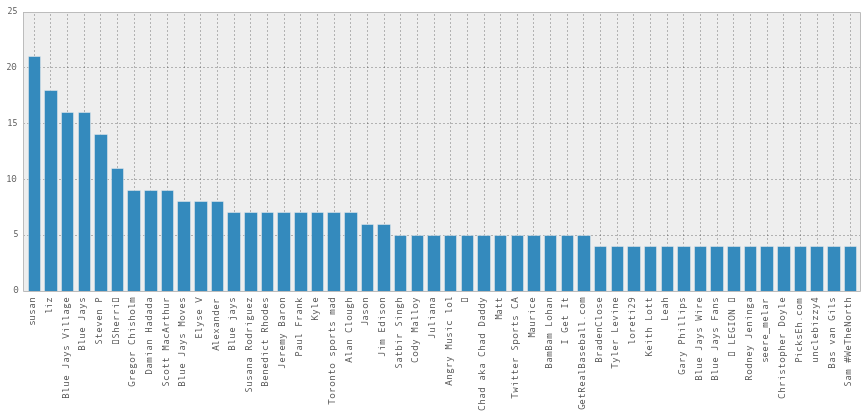

In [11]:
top_tweeter[:50].plot(kind='bar')

In [12]:
top_tweeter[:10]

susan                21
liz                  18
Blue Jays Village    16
Blue Jays            16
Steven P             14
⚾Sherri⚾             11
Gregor Chisholm       9
Damian Hadada         9
Scott MacArthur       9
Blue Jays Moves       8
dtype: int64

The most popular platforms for tweeting
--------------------------------------------

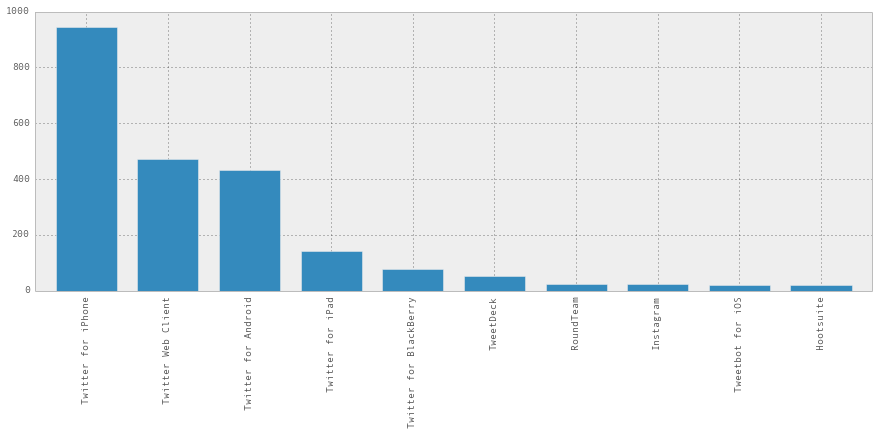

In [13]:
source_tweet = pd.Series.value_counts(df['source'], normalize=False, sort=True, ascending=False, bins=None)
source_tweet[:10].plot(kind='bar')

The following code simply filters out common words like "the" & "and" etc. etc.
------------------------------------------------------------------------------------------

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
stop = stopwords.words('english')
stop2 = stopwords.words('spanish')
otherwords = ['rt', 'vs', '-', '&amp;', '', '#bluejays', '@bluejays']
text = df['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

In [15]:
filtered_tokens = [w for w in tokens if not w in stop]
filtered_tokens_spanish = [w for w in filtered_tokens if not w in stop2]
other_filtered = [w for w in filtered_tokens_spanish if not w in otherwords]
freq_dist = nltk.FreqDist(other_filtered)
z = 20
print "The {} most common words tweeted;".format(z)
x = sorted(freq_dist, key=lambda key: (-freq_dist[key], key))[:z]
for entry  in x:
    print entry

The 20 most common words tweeted;
#cometogether
#openingday
go
season
opening
day
baseball
one
let's
toronto
@amellywood
want
yankee
1st
ok
please
thank
opener
excited
fall


Plotting the top words
-------------------------

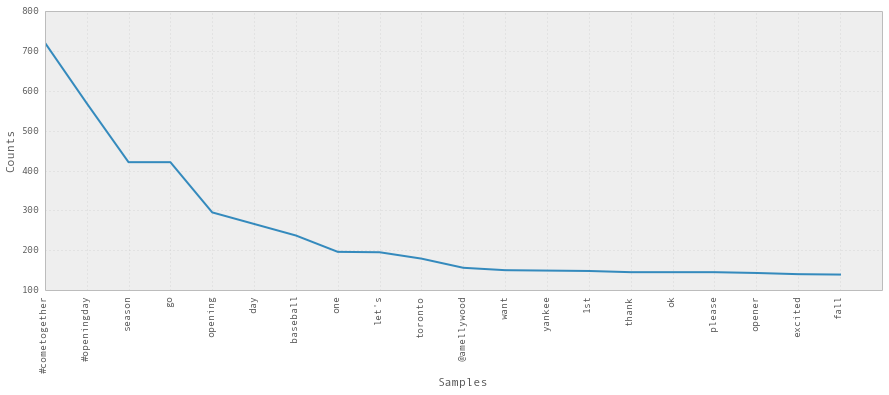

In [16]:
freq_dist.plot(20)

Use Folium to plot geo coordinates on a map
-------------------------------------------------
Only a fraction of twitter users display geo coordinates.  Still gives an interesting map of tweet locations.

In [17]:
import folium
from collections import namedtuple
filepath = "/home/al/projects/twitter/csv/jaysgeo.html"
na_coordinates = (43.641438,-79.389353) # Rogers Centre Toronto, Ontario
na_map = folium.Map(location=na_coordinates, zoom_start=4)
Location = namedtuple('Location', ['latitude', 'longitude'])
count_locations = 0

for line in df.geo:
    if line != None:
        count_locations += 1
        geo_coordinates = line['coordinates']
        location = Location(geo_coordinates[1], geo_coordinates[0])
        na_map.circle_marker(location, fill_color='#2622b5', popup=str(location))

na_map.create_map(filepath)

IOError: [Errno 2] No such file or directory: '/home/al/projects/twitter/csv/jaysgeo.html'

In [ ]:
print str(count_locations) + " users reporting coordinates"
print str(total_tweets) + " total tweets"
percent = round(float(count_locations) / float(total_tweets) * 100, 2)
print str(percent) + "%"

Create a map of tweets
============
Start a local webserver with the following

    python -m SimpleHTTPServer 8000

In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://localhost:8000/csv/jaysgeo.html width=960 height=530></iframe>')